<a href="https://colab.research.google.com/github/2303A52060/sml_assignments/blob/main/Assignment_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment-12

Question 1:

https://www.kaggle.com/datasets/kellistephenson/increasing-breast-cancer-awarenessLinks to an external site.



Read the data with pandas and find features and target variables
Find target variable
Train SVM, KNN, Logistic regression and find accuracy
Draw bootstrapping plots for each model

Index(['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3', 'Protein4',
       'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status',
       'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')
SVM Accuracy: 0.7015
KNN Accuracy: 0.6567
Logistic Regression Accuracy: 0.7015


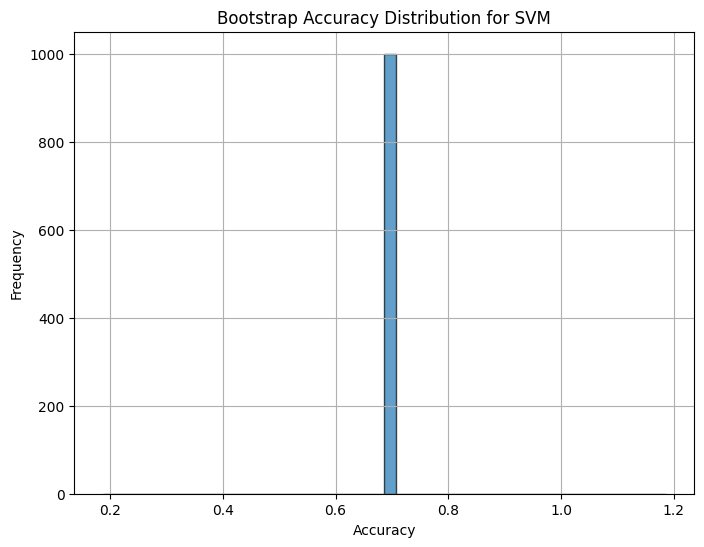

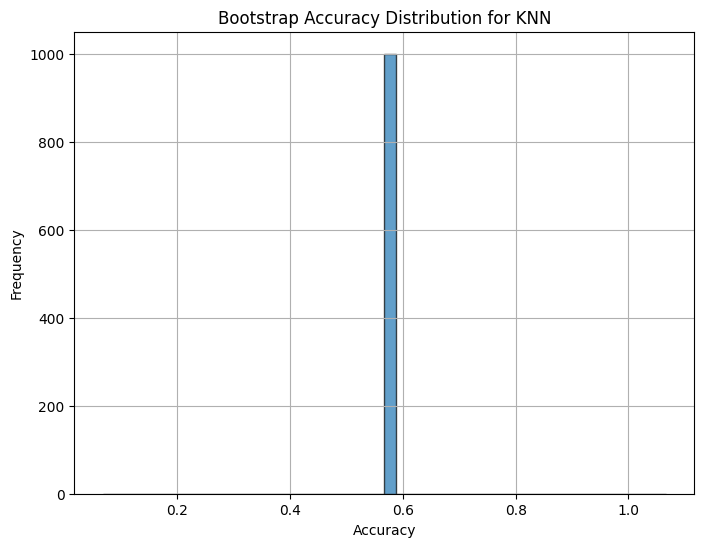

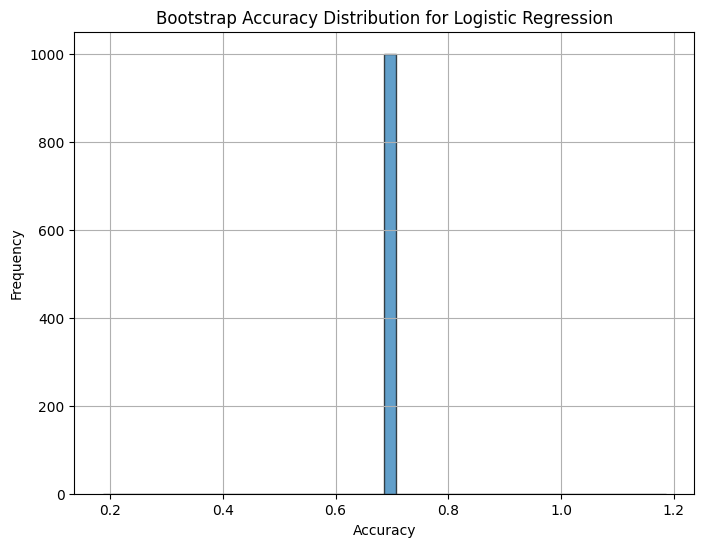

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

# Load the dataset (adjust the file path if needed)
df = pd.read_csv('breast_cancer_survival.csv')

# Inspect the column names to find the target column
print(df.columns)

# Replace 'Histology' with the correct target column after inspecting the dataset
X = df.drop(columns=['Histology'])  # Replace 'Histology' with the actual target column name
y = df['Histology']  # Replace 'Histology' with the actual target column name

# Convert categorical columns to numerical values
# If 'Gender' is a categorical column, use one-hot encoding or label encoding.
X = pd.get_dummies(X, columns=['Gender'], drop_first=True)  # One-hot encoding for 'Gender'

# Identify and convert other categorical features to numerical
# Get a list of columns with object (string) dtype
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply Label Encoding or One-Hot Encoding to these columns
# Here, I'm using Label Encoding for demonstration, but consider One-Hot Encoding if necessary
for col in categorical_cols:
    label_encoder = LabelEncoder() # Create a LabelEncoder for each column
    X[col] = label_encoder.fit_transform(X[col])

# If the target 'Histology' is categorical (like 'III', 'II', etc.), we need to encode it numerically
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # This will convert 'III', 'II', etc., to integers

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ... (Rest of your code remains the same)
# Initialize models
svm = SVC(random_state=42)
knn = KNeighborsClassifier()
log_reg = LogisticRegression(max_iter=10000, random_state=42)

# Train models and compute accuracy
svm.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)
log_reg.fit(X_train_scaled, y_train)

svm_accuracy = accuracy_score(y_test, svm.predict(X_test_scaled))
knn_accuracy = accuracy_score(y_test, knn.predict(X_test_scaled))
log_reg_accuracy = accuracy_score(y_test, log_reg.predict(X_test_scaled))

print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"KNN Accuracy: {knn_accuracy:.4f}")
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.4f}")

# Bootstrapping function
def bootstrap_accuracy(model, X_train, y_train, X_test, y_test, n_iterations=1000):
    accuracies = []
    for _ in range(n_iterations):
        X_resampled, y_resampled = resample(X_train, y_train, random_state=42)
        model.fit(X_resampled, y_resampled)
        predictions = model.predict(X_test)
        accuracies.append(accuracy_score(y_test, predictions))
    return accuracies

# Get bootstrapped accuracies
svm_accuracies = bootstrap_accuracy(svm, X_train_scaled, y_train, X_test_scaled, y_test)
knn_accuracies = bootstrap_accuracy(knn, X_train_scaled, y_train, X_test_scaled, y_test)
log_reg_accuracies = bootstrap_accuracy(log_reg, X_train_scaled, y_train, X_test_scaled, y_test)

# Plot bootstrapping accuracies
def plot_bootstrap_accuracies(accuracies, model_name):
    plt.figure(figsize=(8, 6))
    plt.hist(accuracies, bins=50, edgecolor='black', alpha=0.7)
    plt.title(f'Bootstrap Accuracy Distribution for {model_name}')
    plt.xlabel('Accuracy')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Plot for each model
plot_bootstrap_accuracies(svm_accuracies, 'SVM')
plot_bootstrap_accuracies(knn_accuracies, 'KNN')
plot_bootstrap_accuracies(log_reg_accuracies, 'Logistic Regression')
